In [245]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [246]:
dataset=load_wine()

In [247]:
df=pd.DataFrame(dataset['data'],columns=dataset['feature_names'])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [248]:
df['Wine Quality']=dataset["target"]
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Wine Quality
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [249]:
dataset['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [250]:
df['wine name']=df['Wine Quality'].replace(to_replace=[0,1,2],value=dataset['target_names'])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Wine Quality,wine name
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


In [251]:
df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Wine Quality,wine name
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2,class_2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2,class_2


In [252]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,0:13]
Y=df.iloc[:,14:15]
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.20,random_state=1)

In [253]:
xtest.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
161,13.69,3.26,2.54,20.0,107.0,1.83,0.56,0.50,0.80,5.88,0.96,1.82,680.0
117,12.42,1.61,2.19,22.5,108.0,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345.0
19,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845.0
69,12.21,1.19,1.75,16.8,151.0,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718.0
53,13.77,1.90,2.68,17.1,115.0,3.00,2.79,0.39,1.68,6.30,1.13,2.93,1375.0


In [254]:
print("Xtest shape",xtest.shape)
print("Xtrain shape",xtrain.shape)
print("Ytrain shape",ytrain.shape)

Xtest shape (36, 13)
Xtrain shape (142, 13)
Ytrain shape (142, 1)


In [255]:
from sklearn.preprocessing import  MinMaxScaler

In [256]:
scaler=MinMaxScaler()
xtrain_transform=scaler.fit_transform(xtrain)
xtest_transform=scaler.fit_transform(xtest)

In [257]:
xtrain_transform[0:10]

array([[0.25526316, 0.1244898 , 0.56684492, 0.63687151, 0.17391304,
        0.16206897, 0.19198312, 0.74      , 0.38485804, 0.19795222,
        0.43103448, 0.50549451, 0.12268188],
       [0.44473684, 0.18571429, 0.44919786, 0.45810056, 0.17391304,
        0.42068966, 0.46202532, 0.26      , 0.42902208, 0.22354949,
        0.52586207, 0.68498168, 0.31098431],
       [0.27631579, 0.1       , 0.60962567, 0.66480447, 0.15217391,
        0.54482759, 0.41139241, 0.6       , 0.19873817, 0.13822526,
        0.32758621, 0.7032967 , 0.07631954],
       [0.80789474, 0.22857143, 0.55614973, 0.45810056, 0.35869565,
        0.61034483, 0.5443038 , 0.38      , 0.6214511 , 0.41979522,
        0.44827586, 0.54212454, 0.55777461],
       [0.71315789, 0.15714286, 0.47593583, 0.32402235, 0.52173913,
        0.55862069, 0.54008439, 0.16      , 0.38170347, 0.38993174,
        0.31896552, 0.70695971, 0.55777461],
       [0.35263158, 0.00816327, 0.        , 0.        , 0.19565217,
        0.34482759, 0.04852

In [258]:
from sklearn.neural_network import MLPClassifier

In [259]:
xtest_transform[0:10]

array([[0.76767677, 0.65116279, 0.67521368, 0.44444444, 0.34328358,
        0.234375  , 0.02531646, 0.69230769, 0.        , 0.39422085,
        0.57831325, 0.23043478, 0.29797571],
       [0.34006734, 0.2248062 , 0.37606838, 0.58333333, 0.35820896,
        0.32291667, 0.50949367, 0.38461538, 0.375     , 0.        ,
        0.69879518, 0.72608696, 0.02672065],
       [0.75084175, 0.60981912, 0.69230769, 0.17777778, 0.47761194,
        0.6875    , 0.80696203, 0.05769231, 0.39814815, 0.31372549,
        0.57831325, 0.9       , 0.43157895],
       [0.26936027, 0.11627907, 0.        , 0.26666667, 1.        ,
        0.24479167, 0.25316456, 0.        , 0.78703704, 0.08152735,
        0.96385542, 0.77391304, 0.32874494],
       [0.79461279, 0.2997416 , 0.79487179, 0.28333333, 0.46268657,
        0.84375   , 0.73101266, 0.48076923, 0.40740741, 0.4375645 ,
        0.78313253, 0.71304348, 0.86072874],
       [0.7003367 , 0.73643411, 0.37606838, 0.41666667, 0.05970149,
        0.125     , 0.     

In [260]:
model=MLPClassifier(hidden_layer_sizes=(300,200,100),alpha=0.0001,activation='relu',max_iter=300,solver='adam')

In [261]:
model.fit(xtrain_transform,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(300, 200, 100), max_iter=300)

In [262]:
ypred=model.predict(xtest_transform)

In [263]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [264]:
accuracy=accuracy_score(ytest,ypred)
print("accuracy is",accuracy)

accuracy is 0.9722222222222222


In [265]:
cm=confusion_matrix(ytest,ypred)
cm

array([[14,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  8]])

In [266]:
from sklearn.metrics import classification_report
cr=classification_report(ytest,ypred)

In [267]:
print(cr)

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       0.93      1.00      0.96        13
     class_2       1.00      0.89      0.94         9

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36



Text(0, 0.5, 'loss')

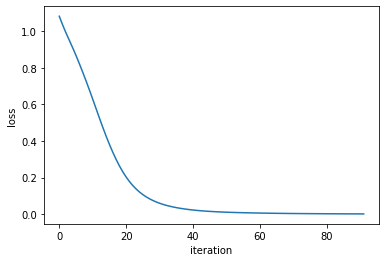

In [268]:
plt.plot(model.loss_curve_)
plt.xlabel("iteration")
plt.ylabel("loss")
